In [1]:
import os

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout

In [2]:
labels = ['no', 'yes']
img_size = 21
def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv.imread(os.path.join(path, img), cv.IMREAD_GRAYSCALE)
                resized_arr = cv.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return data

<Axes: xlabel='count'>

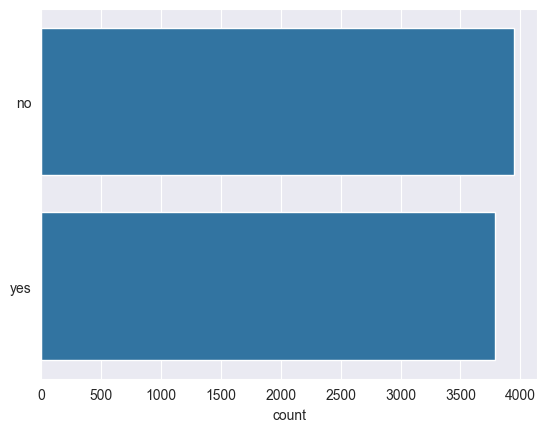

In [3]:
train = get_data('data\\lattice_points\\train')
val = get_data('data\\lattice_points\\val')
test = get_data('data\\lattice_points\\test')

l = []
for i in train:
    if(i[1] == 0):
        l.append('no')
    else:
        l.append('yes')
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'no')

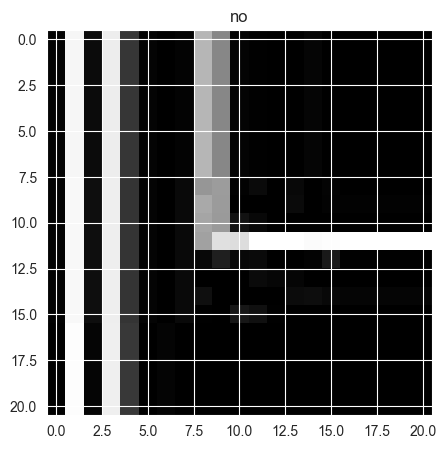

In [4]:
plt.figure(figsize=(5,5))
plt.imshow(train[1][0], cmap='gray')
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'yes')

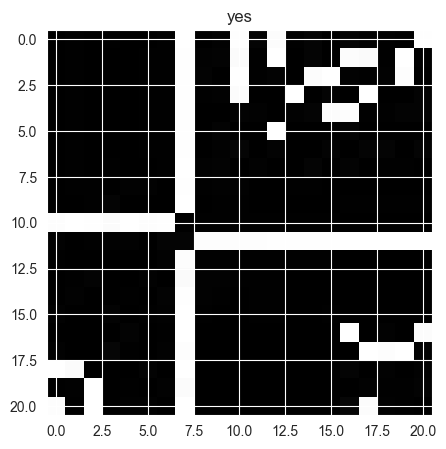

In [5]:
plt.figure(figsize=(5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

In [6]:
x_train = []
y_train = []
x_val = []
y_val = []
x_test = []
y_test = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

for feature, label in test:
  x_test.append(feature)
  y_test.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [7]:
model = Sequential()
model.add(Conv2D(32, 3, padding='same', activation='relu', input_shape=(21,21,1)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 21, 21, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 10, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 64)          0

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val))
model.save('models/lattice_points.model.keras')

Epoch 1/50
242/242 [==============================] - 4s 11ms/step - loss: 0.3934 - accuracy: 0.8181 - val_loss: 0.1959 - val_accuracy: 0.9306
Epoch 2/50
242/242 [==============================] - 3s 10ms/step - loss: 0.1681 - accuracy: 0.9332 - val_loss: 0.1166 - val_accuracy: 0.9576
Epoch 3/50
242/242 [==============================] - 3s 10ms/step - loss: 0.1220 - accuracy: 0.9528 - val_loss: 0.0979 - val_accuracy: 0.9617
Epoch 4/50
242/242 [==============================] - 2s 10ms/step - loss: 0.0894 - accuracy: 0.9662 - val_loss: 0.1413 - val_accuracy: 0.9493
Epoch 5/50
242/242 [==============================] - 2s 10ms/step - loss: 0.0787 - accuracy: 0.9702 - val_loss: 0.0829 - val_accuracy: 0.9689
Epoch 6/50
242/242 [==============================] - 2s 10ms/step - loss: 0.0623 - accuracy: 0.9777 - val_loss: 0.1028 - val_accuracy: 0.9669
Epoch 7/50
242/242 [==============================] - 2s 10ms/step - loss: 0.0513 - accuracy: 0.9824 - val_loss: 0.0760 - val_accuracy: 0.9741

In [10]:
evaluation = model.evaluate(x_test, y_test)
print('Test Loss: {}'.format(evaluation[0]))
print('Test Accuracy: {}'.format(evaluation[1]))

 1/31 [..............................] - ETA: 0s - loss: 2.3469e-07 - accuracy: 1.0000

31/31 [==============================] - 0s 4ms/step - loss: 0.0625 - accuracy: 0.9886
Test Loss: 0.06248295679688454
Test Accuracy: 0.9886363744735718


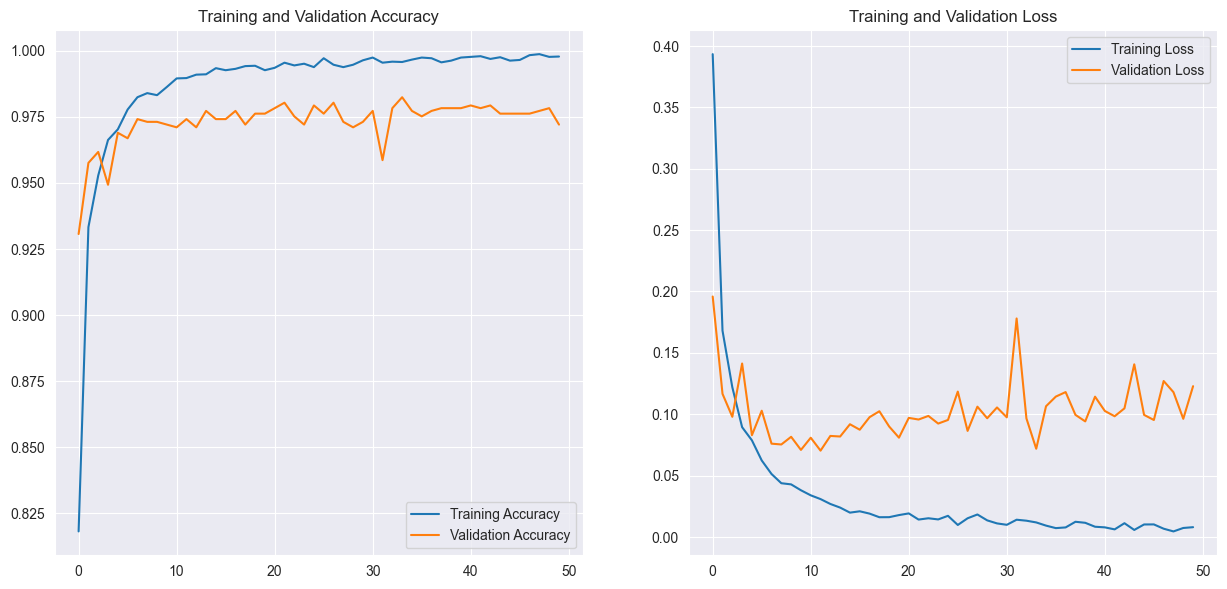

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Tests:

In [12]:
from keras.models import load_model

model = load_model('models/lattice_points.model.keras')

img = cv.imread('data/lattice_points/test/yes/-591873594536937884_180.jpg', cv.IMREAD_GRAYSCALE)
img = img.reshape(1, 21, 21, 1) / 255.0

predict_x = model.predict(img)
classes_x = np.argmax(predict_x, axis=1)
prediction, confidence = classes_x[0], predict_x[0][classes_x[0]]
print(prediction, confidence)

img = cv.imread('data/lattice_points/test/no/-154820115971106648_180.jpg', cv.IMREAD_GRAYSCALE)
img = img.reshape(1, 21, 21, 1) / 255.0

model = load_model('models/lattice_points.model.keras', compile=True)

predict_x = model.predict(img)
classes_x = np.argmax(predict_x, axis=1)
prediction, confidence = classes_x[0], predict_x[0][classes_x[0]]
print(prediction, confidence)

1/1 [==============================] - 0s 110ms/step
1 0.9999676
1/1 [==============================] - 0s 74ms/step
0 0.9999999
